In [97]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = np.array([[randint(0, 1), randint(20, 170), randint(18, 80)] for _ in range(1_000)])
df = pd.DataFrame(data, columns=['gender', 'speed', 'age'])
df['gender'] = df['gender'].apply(lambda x: 'M' if x else 'F')

In [94]:
df['choice_of_survival'] = df.apply(lambda x: np.exp( - (x.age - 30)**2 / 10000 - (x.speed - 20)**2 / 3000), axis=1)
df['survived'] = df.apply(lambda x: np.random.choice([0, 1], p=[1 - x.choice_of_survival, x.choice_of_survival]), axis=1)

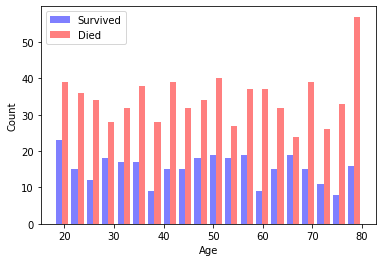

In [101]:
# for visualize 2 graph together i use plt.hist
plt.hist([df[df['survived'] == 1]['age'], df[df['survived'] == 0]['age']], bins=20, alpha=0.5, color=['blue', 'red'], label=['Survived', 'Died'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

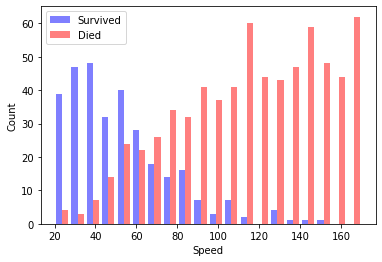

In [102]:
# check now the speed
plt.hist([df[df['survived'] == 1]['speed'], df[df['survived'] == 0]['speed']], bins=20, alpha=0.5, color=['blue', 'red'], label=['Survived', 'Died'])
plt.xlabel('Speed')
plt.ylabel('Count')
plt.legend()

Text(0, 0.5, 'Speed')

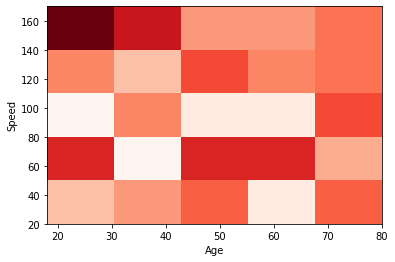

In [107]:
plt.hist2d(df['age'], df['speed'], bins=5, cmap='Reds')
plt.xlabel('Age')
plt.ylabel('Speed')